<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Adapted by Valdis Saulespurens from [Nathan Kelber](http://nkelber.com) and Ted Lawless for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />

____
# Exploring Word Frequencies

**Description:**
This [notebook](https://docs.constellate.org/key-terms/#jupyter-notebook) shows how to find the most common words in a
[dataset](https://docs.constellate.org/key-terms/#dataset). The following processes are described:

* Loading our dataset in Pandas DataFrame
* Filtering based on a pre-processed ID list
* Filtering based on a [stop words list](https://docs.constellate.org/key-terms/#stop-words)
* Using a `Counter()` object to get the most common words
* Visualizating results

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)


**Difficulty:** Intermediate

**Completion time:** 60 minutes

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](./python-basics-1.ipynb))

**Knowledge Recommended:**

* [Working with Dataset Files](./working-with-dataset-files.ipynb)
* [Pandas I](./pandas-1.ipynb)
* [Counter Objects](./counter-objects.ipynb)
* [Creating a Stopwords List](./creating-stopwords-list.ipynb)

**Data Format:** [JSON Lines (.jsonl)](https://docs.constellate.org/key-terms/#jsonl)

**Libraries Used:**

* [NLTK](https://docs.constellate.org/key-terms/#nltk) to help [clean](https://docs.constellate.org/key-terms/#clean-data) up our dataset
* [Counter](https://docs.constellate.org/key-terms/#python-counter) from **Collections** to help sum up our word frequencies
* [Matplotlib](https://matplotlib.org/stable/index.html) - visualizations
* [WordCloud](https://pypi.org/project/wordcloud/) - for wordcloud visualizations
* [Plotly](https://plotly.com/python/) - for interactive visualizations

**Research Pipeline:**

1. Build a dataset
2. Create a "Pre-Processing CSV" with [Exploring Metadata](./exploring-metadata.ipynb) (Optional)
3. Create a "Custom Stopwords List" with [Creating a Stopwords List](./creating-stopwords-list.ipynb) (Optional)
4. Complete the word frequencies analysis with this notebook
___

In [ ]:

from collections import Counter
import os
import pandas
import requests

In [ ]:
# Approach 2 reading from a web address 
url = "https://github.com/ValRCS/BSSDH_22/raw/main/corpora/lv_old_newspapers_5k.tsv"

df = pandas.read_csv(url, sep="\t") 
df.head()

,Language,Source,Date,Text
0,Latvian,rekurzeme.lv,2008/09/04,"""Viņa pirmsnāves zīmītē bija rakstīts vienīgi ..."
1,Latvian,diena.lv,2012/01/10,info@zurnalistiem.lv
2,Latvian,bauskasdzive.lv,2007/12/27,"Bhuto, kas Pakistānā no trimdas atgriezās tika..."
3,Latvian,bauskasdzive.lv,2008/10/08,Plkst. 4.00 Samoilovs / Pļaviņš (pludmales vol...
4,Latvian,diena.lv,2011/10/05,"CVK bija vērsusies Skaburska, lūdzot izskaidro..."


### Load Stopwords List

If you have created a stopword list in the stopwords notebook, we will import it here. (You can always modify the CSV file to add or subtract words then reload the list.) Otherwise, we'll load the NLTK [stopwords](https://docs.constellate.org/key-terms/#stop-words) list automatically.

In [ ]:
    # how to find all languages stopwords built in NLTK
    # https://stackoverflow.com/questions/54573853/nltk-available-languages-for-stopwords
    # bigger collection of all stopwords
    # https://github.com/stopwords-iso
    # latvian https://github.com/stopwords-iso/stopwords-lv/raw/master/stopwords-lv.txt

In [ ]:
url = "https://github.com/stopwords-iso/stopwords-lv/raw/master/stopwords-lv.txt"
stop_words = []
response = requests.get(url)
if response.status_code == 200:
    stop_words = response.text.split()
len(stop_words)


161

In [ ]:
with open("stop_words.csv", "w", encoding="utf-8") as f:
    f.write(response.text) # csv is really text here no commas at all

In [ ]:
# Load a custom data/stop_words.csv if available
# Otherwise, load the nltk stopwords list in English

# Create an empty Python list to hold the stopwords
# you would run this cell if you did not have stop_words loaded already
stop_words = [] # we destroy any previous stop_words list

# The filename of the custom data/stop_words.csv file
stopwords_list_filename = 'stop_words.csv'

# useful when we are not sure if the file name exists
if os.path.exists(stopwords_list_filename):
    import csv  #Python built in csv library, smaller than Pandas if you do not need anything fancy
    with open(stopwords_list_filename, 'r') as f:
        stop_words = [w[0] for w in list(csv.reader(f))]
    print('Custom stopwords list loaded from CSV')
else:
    # Load the NLTK stopwords list
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english') # change it to your language if it is supported by nltk

    print('NLTK stopwords list loaded')
len(stop_words)

Custom stopwords list loaded from CSV


161

In [ ]:
stop_words[:3]

['aiz', 'ap', 'apakš']

### Gather unigrams again with extra cleaning steps
In addition to using a stopwords list, we will clean up the tokens by lowercasing all tokens and combining them. This will combine tokens with different capitalization such as "quarterly" and "Quarterly." We will also remove any tokens that are not alphanumeric.

In [ ]:
df.head(2)

,Language,Source,Date,Text
0,Latvian,rekurzeme.lv,2008/09/04,"""Viņa pirmsnāves zīmītē bija rakstīts vienīgi ..."
1,Latvian,diena.lv,2012/01/10,info@zurnalistiem.lv


In [ ]:
documents = list(df.Text)
len(documents)

4999

In [ ]:
text = "\n".join(documents)
len(text)

1415137

In [ ]:
text_lower = text.lower()


In [ ]:
tokens = text_lower.split()
len(tokens)

193133

In [ ]:
words = [token for token in tokens if token.isalnum()]
len(words)

153020

In [ ]:
stop_words[:5]

[['aiz'], ['ap'], ['apakš'], ['apakšpus'], ['ar']]

In [ ]:
words_clean = [word for word in words if word not in stop_words]
len(words_clean)

118091

In [ ]:
# Gather unigramCounts from documents 
# and apply the processing.

word_frequency = Counter(words_clean)



## Display Results
Finally, we will display the 20 most common words by using the `.most_common()` method on the `Counter()` object.

In [ ]:
# Print the most common processed unigrams and their counts
for gram, count in word_frequency.most_common(25):
    print(gram.ljust(20), count)

kas                  1052
nav                  794
to                   628
latvijas             587
tas                  518
valsts               502
vēl                  388
ko                   362
kad                  327
viņš                 319
gada                 314
viņa                 307
ļoti                 274
kur                  270
savu                 263
darba                263
šo                   259
laikā                252
vairāk               249
varētu               243
būtu                 241
tās                  234
savukārt             225
es                   217
gadu                 209


## Export Results to a CSV File
The word frequency data can be exported to a CSV file.

In [ ]:
# Add output method to csv
import csv

with open(f'word_frequencies.csv', 'w', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(['unigram', 'count'])
    for gram, count in word_frequency.most_common():
        writer.writerow([gram, count])
    

## Create a Word Cloud to Visualize the Data
A visualization using the WordCloud library in Python. To learn more about customizing a wordcloud, [see the documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). 

In [ ]:
# Add wordcloud
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
### Download cloud image for our word cloud shape
import urllib.request
download_url = 'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/sample_cloud.png'
urllib.request.urlretrieve(download_url, 'sample_cloud.png')

('sample_cloud.png', <http.client.HTTPMessage at 0x7fb2eb213350>)

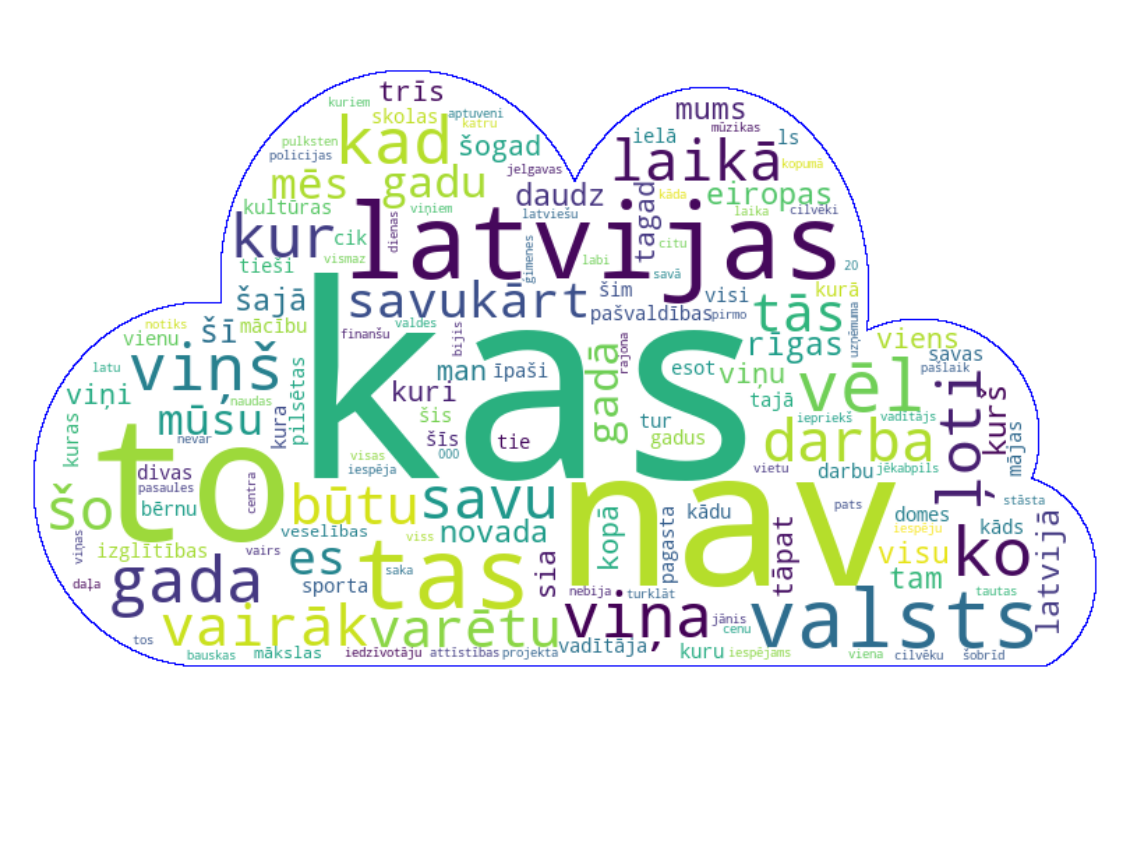

In [ ]:
# Create a wordcloud from our data

# Adding a mask shape of a cloud to your word cloud
# By default, the shape will be a rectangle
# You can specify any shape you like based on an image file
cloud_mask = np.array(Image.open('sample_cloud.png')) # Specifies the location of the mask shape
cloud_mask = np.where(cloud_mask > 3, 255, cloud_mask) # this line will take all values greater than 3 and make them 255 (white)

### Specify word cloud details
wordcloud = WordCloud(
    width = 800, # Change the pixel width of the image if blurry
    height = 600, # Change the pixel height of the image if blurry
    background_color = "white", # Change the background color
    colormap = 'viridis', # The colors of the words, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
    max_words = 150, # Change the max number of words shown
    min_font_size = 4, # Do not show small text
    
    # Add a shape and outline (known as a mask) to your wordcloud
    contour_color = 'blue', # The outline color of your mask shape
    mask = cloud_mask, # 
    contour_width = 1
).generate_from_frequencies(word_frequency)

# save wordcloud to file
wordcloud.to_file("my_wordcloud.png")
# alternative would be to right click save image as to save locally to your computer

mpl.rcParams['figure.figsize'] = (20,20) # Change the image size displayed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# now let's creat some bubble charts for our most frequent words
# https://plotly.com/python/bubble-charts/
import plotly.graph_objects as go


In [ ]:
# we will need to separate our frequency data into x axis - words
# y axis will be the frequency
X = []
Y = []
max_count = 100
for x,y in word_frequency.most_common(max_count):
    X.append(x)
    Y.append(y)
# there are other methods for doing the above but this one is simple
X[:5],Y[:5]


(['kas', 'nav', 'to', 'latvijas', 'tas'], [1052, 794, 628, 587, 518])

In [ ]:
# Basic Scatter Plot 
fig = go.Figure(data=[go.Scatter(
    x=X, y=Y,
    mode='markers')
])

fig.show()

In [ ]:
# we will use length of word to determine size
sizes = [len(x) for x in X]
sizes[:5]

[3, 3, 2, 8, 3]

In [ ]:
# Utilize size in the plot
fig = go.Figure(data=[go.Scatter(
    x=X, y=Y,
    mode='markers',
    marker_size=sizes)
])

fig.show()

In [ ]:
# if we are not happy with the size we can adjust it ad hoc - use your own judgment
big_sizes = [n*4 for n in sizes] # just for plotly
fig = go.Figure(data=[go.Scatter(
    x=X, y=Y,
    mode='markers',
    marker_size=big_sizes)
])

fig.show()

In [ ]:
# we can assign custom colors for all 100 words 
# first we will take 4 colors and simply multiply / pad to have 100 colors - repeating every 4
colors = ['rgb(93, 164, 214)', 'rgb(255, 144, 14)','rgb(44, 160, 101)', 'rgb(255, 65, 54)'] * 25 # we need 100 colors
len(colors)              

100

In [ ]:
colors[:9]

['rgb(93, 164, 214)',
 'rgb(255, 144, 14)',
 'rgb(44, 160, 101)',
 'rgb(255, 65, 54)',
 'rgb(93, 164, 214)',
 'rgb(255, 144, 14)',
 'rgb(44, 160, 101)',
 'rgb(255, 65, 54)',
 'rgb(93, 164, 214)']

In [ ]:

fig = go.Figure(data=[go.Scatter(
    x=X, y=Y,
    mode='markers',
    marker_size=big_sizes,
    marker_color=colors # determines colors, you could supply single color as well as string))
)])
fig.show()

In [ ]:
# let us create a function that will create custom color for word
# here we are still using length but could use anything else
# one good use would be Part of Speech - POS if you have it
def get_custom_color(word):
    return f"rgb({255 - len(word) * 15}, 164, 214)" # purplish

In [ ]:
custom_colors = [get_custom_color(w) for w in X]
custom_colors[:3]

['rgb(210, 164, 214)', 'rgb(210, 164, 214)', 'rgb(225, 164, 214)']

In [ ]:
# final bubbly chart with custom colors and sizes
fig = go.Figure(data=[go.Scatter(
    x=X, y=Y,
    mode='markers',
    marker_size=big_sizes,
    marker_color=custom_colors)
])

fig.show()

In [ ]:
# Try creating a word_frequency for your own data now
# start with basic plot and then proceed to more customization